## Calculating Descriptive Statistics 1
Start by importing all the packages you’ll need:

In [1]:
# from Python Statistics Fundamentals: How to Describe Your Data
# see also https://realpython.com/python-statistics/
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

These are all the packages you’ll need for Python statistics calculations. Usually, you won’t use Python’s built-in math package, but it’ll be useful in this tutorial. Later, you’ll import matplotlib.pyplot for data visualization.

Let’s create some data to work with. You’ll start with Python lists that contain some arbitrary numeric data:

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]
x

x_with_nan

[8.0, 1, 2.5, nan, 4, 28.0]

Now you have the lists x and x_with_nan. They’re almost the same, with the difference that x_with_nan contains a nan value. It’s important to understand the behavior of the Python statistics routines when they come across a not-a-number value (nan). In data science, missing values are common, and you’ll often replace them with nan.

Now, create np.ndarray and pd.Series objects that correspond to x and x_with_nan:

In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

y
y_with_nan

z
z_with_nan

0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64

You now have two NumPy arrays (y and y_with_nan) and two Pandas Series (z and z_with_nan). All of these are 1D sequences of values.

## Measures of Central Tendency
The measures of central tendency show the central or middle values of datasets. There are several definitions of what’s considered to be the center of a dataset. In this tutorial, you’ll learn how to identify and calculate these measures of central tendency:

+ Mean
+ Weighted mean
+ Geometric mean
+ Harmonic mean
+ Median
+ Mode
+ Mean

The sample mean, also called the sample arithmetic mean or simply the average, is the arithmetic average of all the items in a dataset. The mean of a dataset 𝑥 is mathematically expressed as Σᵢ𝑥ᵢ/𝑛, where 𝑖 = 1, 2, …, 𝑛. In other words, it’s the sum of all the elements 𝑥ᵢ divided by the number of items in the dataset 𝑥.

This figure illustrates the mean of a sample with five data points:
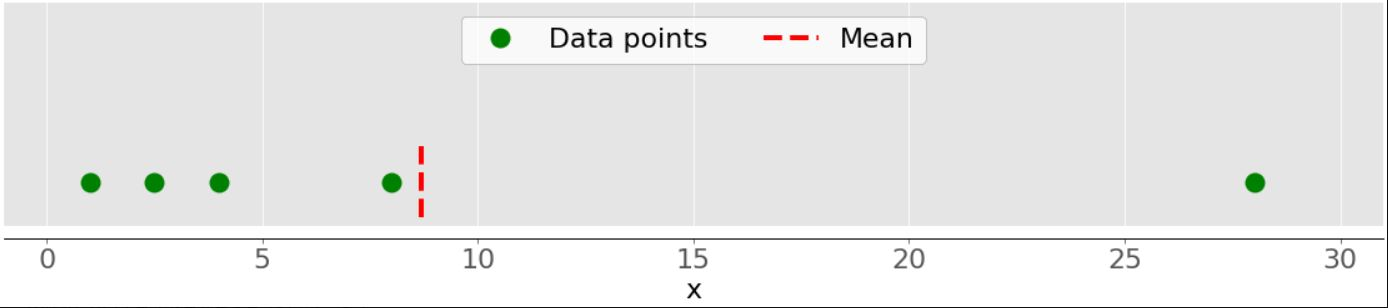


Python Statistics
The green dots represent the data points 1, 2.5, 4, 8, and 28. The red dashed line is their mean, or (1 + 2.5 + 4 + 8 + 28) / 5 = 8.7.

You can calculate the mean with pure Python using sum() and len(), without importing libraries:

In [4]:
mean_ = sum(x) / len(x)
print(sum(x))
print(len(x))
mean_

43.5
5


8.7

Although this is clean and elegant, you can also apply built-in Python statistics functions:

In [5]:
mean_ = statistics.mean(x)
mean_

8.7

You’ve called the functions mean() and fmean() from the built-in Python statistics library and got the same result as you did with pure Python. fmean() is introduced in Python 3.8 as a faster alternative to mean(). It always returns a floating-point number.

However, if there are nan values among your data, then statistics.mean() and statistics.fmean() will return nan as the output:

In [6]:
mean_ = statistics.mean(x_with_nan)
mean_

nan

This result is consistent with the behavior of sum(), because sum(x_with_nan) also returns nan.

If you use NumPy, then you can get the mean with np.mean():

In [7]:
mean_ = np.mean(y)
mean_

8.7

In the example above, mean() is a function, but you can use the corresponding method .mean() as well:

In [8]:
mean_ = y.mean()
mean_

8.7

The function mean() and method .mean() from NumPy return the same result as statistics.mean(). This is also the case when there are nan values among your data:

In [9]:
np.mean(y_with_nan)

y_with_nan.mean()

nan

You often don’t need to get a nan value as a result. If you prefer to ignore nan values, then you can use np.nanmean():

In [10]:
np.nanmean(y_with_nan)

8.7

nanmean() simply ignores all nan values. It returns the same value as mean() if you were to apply it to the dataset without the nan values.

pd.Series objects also have the method .mean():

In [11]:
mean_ = z.mean()
mean_


8.7

As you can see, it’s used similarly as in the case of NumPy. However, .mean() from Pandas ignores nan values by default:

In [12]:
z_with_nan.mean()


8.7

This behavior is the result of the default value of the optional parameter skipna. You can change this parameter to modify the behavior.

## Weighted Mean
The weighted mean, also called the weighted arithmetic mean or weighted average, is a generalization of the arithmetic mean that enables you to define the relative contribution of each data point to the result.

You define one weight 𝑤ᵢ for each data point 𝑥ᵢ of the dataset 𝑥, where 𝑖 = 1, 2, …, 𝑛 and 𝑛 is the number of items in 𝑥. Then, you multiply each data point with the corresponding weight, sum all the products, and divide the obtained sum with the sum of weights: Σᵢ(𝑤ᵢ𝑥ᵢ) / Σᵢ𝑤ᵢ.

Note: It’s convenient (and usually the case) that all weights are nonnegative, 𝑤ᵢ ≥ 0, and that their sum is equal to one, or Σᵢ𝑤ᵢ = 1.

The weighted mean is very handy when you need the mean of a dataset containing items that occur with given relative frequencies. For example, say that you have a set in which 20% of all items are equal to 2, 50% of the items are equal to 4, and the remaining 30% of the items are equal to 8. You can calculate the mean of such a set like this:

In [13]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

Here, you take the frequencies into account with the weights. With this method, you don’t need to know the total number of items.

You can implement the weighted mean in pure Python by combining sum() with either range() or zip():

In [14]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
wmean

wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
wmean

6.95

Again, this is a clean and elegant implementation where you don’t need to import any libraries.

However, if you have large datasets, then NumPy is likely to provide a better solution. You can use np.average() to get the weighted mean of NumPy arrays or Pandas Series:

In [15]:
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights=w)
wmean

wmean = np.average(z, weights=w)
wmean


6.95

The result is the same as in the case of the pure Python implementation. You can also use this method on ordinary lists and tuples.

Another solution is to use the element-wise product w * y with np.sum() or .sum():

In [16]:
(w * y).sum() / w.sum()

6.95

That’s it! You’ve calculated the weighted mean.

However, be careful if your dataset contains nan values:

In [17]:
w = np.array([0.1, 0.2, 0.3, 0.0, 0.2, 0.1])
print((w * y_with_nan).sum() / w.sum())

print(np.average(y_with_nan, weights=w))

print(np.average(z_with_nan, weights=w))


nan
nan
nan


In this case, average() returns nan, which is consistent with np.mean().

## Harmonic Mean
The harmonic mean is the reciprocal of the mean of the reciprocals of all items in the dataset: 𝑛 / Σᵢ(1/𝑥ᵢ), where 𝑖 = 1, 2, …, 𝑛 and 𝑛 is the number of items in the dataset 𝑥. One variant of the pure Python implementation of the harmonic mean is this:

In [18]:
hmean = len(x) / sum(1 / item for item in x)
hmean

2.7613412228796843

It’s quite different from the value of the arithmetic mean for the same data x, which you calculated to be 8.7.

You can also calculate this measure with statistics.harmonic_mean():

In [19]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

The example above shows one implementation of statistics.harmonic_mean(). If you have a nan value in a dataset, then it’ll return nan. If there’s at least one 0, then it’ll return 0. If you provide at least one negative number, then you’ll get statistics.StatisticsError:

In [20]:
print(statistics.harmonic_mean(x_with_nan))

print(statistics.harmonic_mean([1, 0, 2]))

print(statistics.harmonic_mean([1, 2, -2]))  # Raises StatisticsError

nan
0


StatisticsError: harmonic mean does not support negative values

Keep these three scenarios in mind when you’re using this method!

A third way to calculate the harmonic mean is to use scipy.stats.hmean():

In [21]:
print(scipy.stats.hmean(y))

print(scipy.stats.hmean(z))

2.7613412228796843
2.7613412228796843


Again, this is a pretty straightforward implementation. However, if your dataset contains nan, 0, a negative number, or anything but positive numbers, then you’ll get a ValueError!

## Geometric Mean
The geometric mean is the 𝑛-th root of the product of all 𝑛 elements 𝑥ᵢ in a dataset 𝑥: ⁿ√(Πᵢ𝑥ᵢ), where 𝑖 = 1, 2, …, 𝑛. The following figure illustrates the arithmetic, harmonic, and geometric means of a dataset:

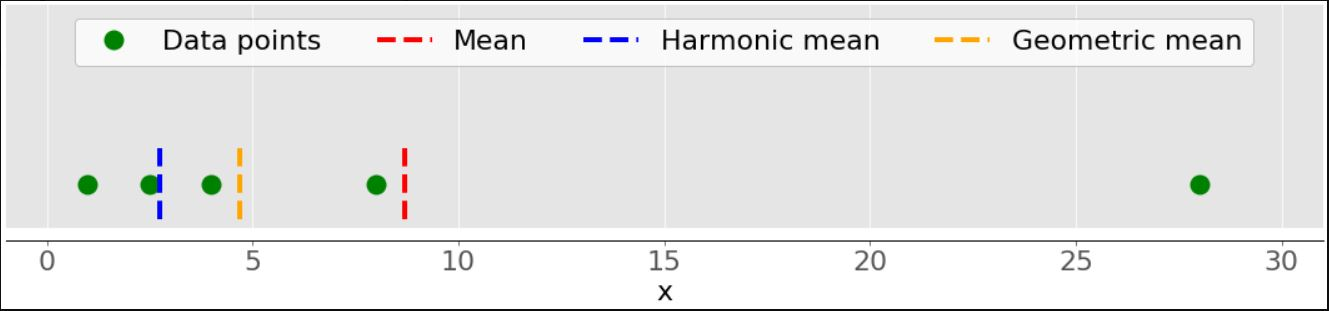

Again, the green dots represent the data points 1, 2.5, 4, 8, and 28. The red dashed line is the mean. The blue dashed line is the harmonic mean, and the yellow dashed line is the geometric mean.

You can implement the geometric mean in pure Python like this:

In [22]:
gmean = 1
for item in x:
    gmean *= item

gmean **= 1 / len(x)
gmean

4.677885674856041

As you can see, the value of the geometric mean, in this case, differs significantly from the values of the arithmetic (8.7) and harmonic (2.76) means for the same dataset x.

Python 3.8 introduced statistics.geometric_mean(), which converts all values to floating-point numbers and returns their geometric mean:

In [23]:
# note error message when using older python version, e.g. AttributeError: module 'statistics' has no attribute 'geometric_mean'
gmean = statistics.geometric_mean(x)
gmean

AttributeError: module 'statistics' has no attribute 'geometric_mean'

You’ve got the same result as in the previous example, but with a minimal rounding error.

If you pass data with nan values, then statistics.geometric_mean() will behave like most similar functions and return nan:

In [24]:
gmean = statistics.geometric_mean(x_with_nan)
gmean

AttributeError: module 'statistics' has no attribute 'geometric_mean'

Indeed, this is consistent with the behavior of statistics.mean(), statistics.fmean(), and statistics.harmonic_mean(). If there’s a zero or negative number among your data, then statistics.geometric_mean() will raise the statistics.StatisticsError.

You can also get the geometric mean with scipy.stats.gmean():

In [25]:
print(scipy.stats.gmean(y))

print(scipy.stats.gmean(z))

4.67788567485604
4.67788567485604


You obtained the same result as with the pure Python implementation.

If you have nan values in a dataset, then gmean() will return nan. If there’s at least one 0, then it’ll return 0.0 and give a warning. If you provide at least one negative number, then you’ll get nan and the warning.

## Median
The sample median is the middle element of a sorted dataset. The dataset can be sorted in increasing or decreasing order. If the number of elements 𝑛 of the dataset is odd, then the median is the value at the middle position: 0.5(𝑛 + 1). If 𝑛 is even, then the median is the arithmetic mean of the two values in the middle, that is, the items at the positions 0.5𝑛 and 0.5𝑛 + 1.

For example, if you have the data points 2, 4, 1, 8, and 9, then the median value is 4, which is in the middle of the sorted dataset (1, 2, 4, 8, 9). If the data points are 2, 4, 1, and 8, then the median is 3, which is the average of the two middle elements of the sorted sequence (2 and 4). The following figure illustrates this:

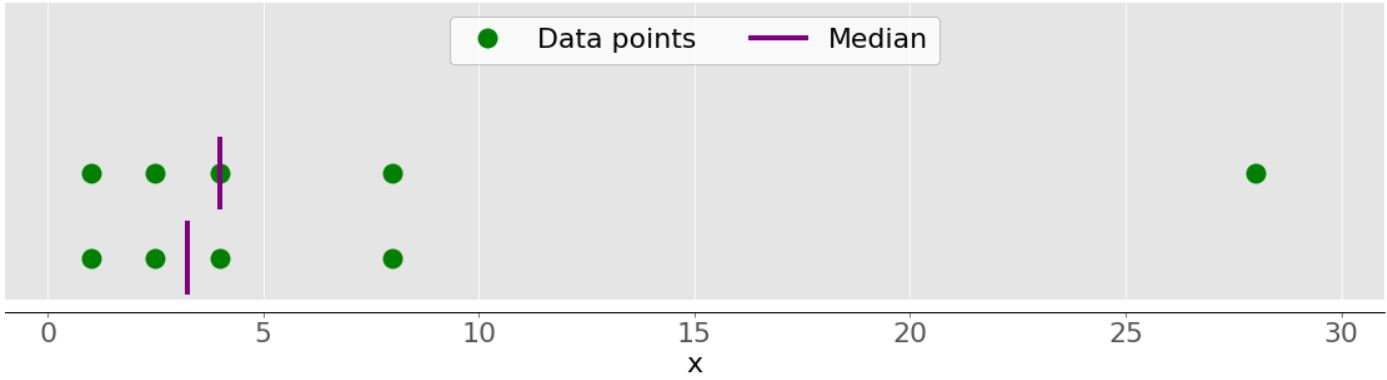

The data points are the green dots, and the purple lines show the median for each dataset. The median value for the upper dataset (1, 2.5, 4, 8, and 28) is 4. If you remove the outlier 28 from the lower dataset, then the median becomes the arithmetic average between 2.5 and 4, which is 3.25.

The figure below shows both the mean and median of the data points 1, 2.5, 4, 8, and 28:

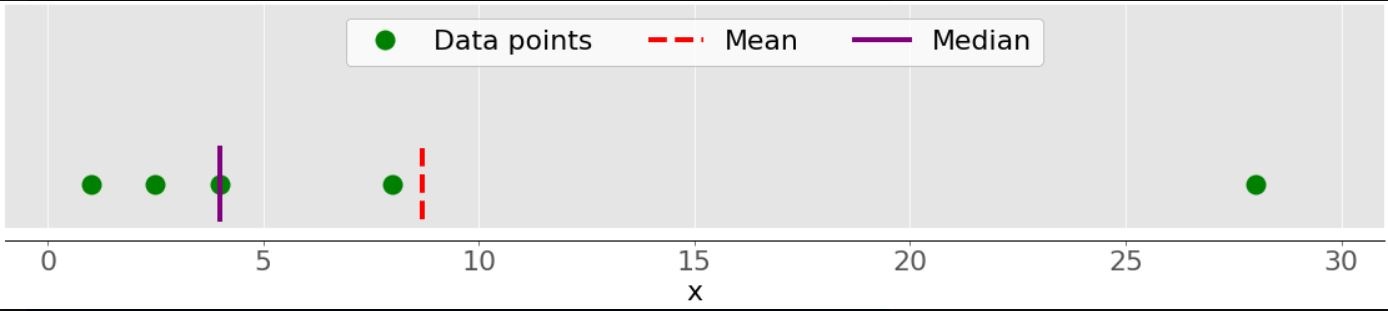

Again, the mean is the red dashed line, while the median is the purple line.

The main difference between the behavior of the mean and median is related to dataset outliers or extremes. The mean is heavily affected by outliers, but the median only depends on outliers either slightly or not at all. 

Consider the following figure:

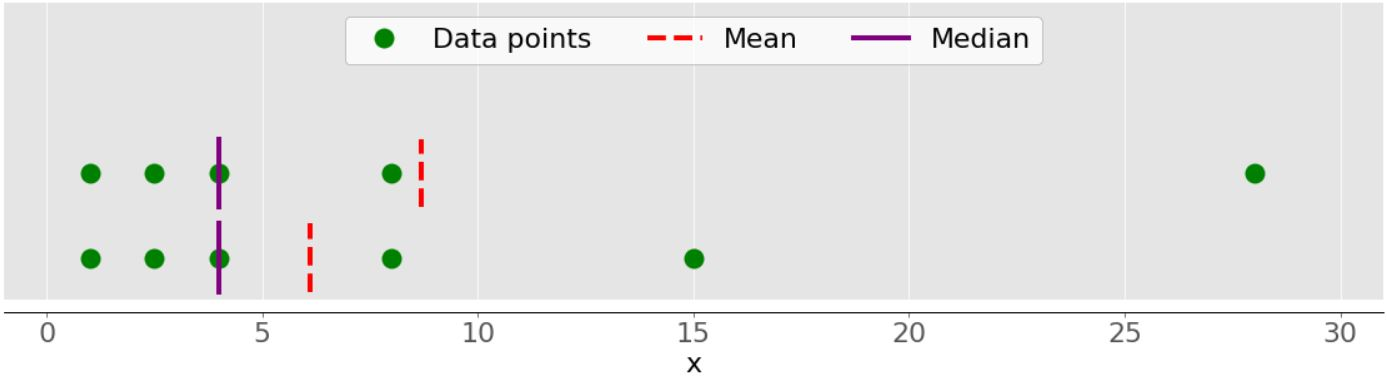

The upper dataset again has the items 1, 2.5, 4, 8, and 28. Its mean is 8.7, and the median is 5, as you saw earlier. The lower dataset shows what’s going on when you move the rightmost point with the value 28:

+ If you increase its value (move it to the right), then the mean will rise, but the median value won’t ever change.
+ If you decrease its value (move it to the left), then the mean will drop, but the median will remain the same until the value of the moving point is greater than or equal to 4.

You can compare the mean and median as one way to detect outliers and asymmetry in your data. Whether the mean value or the median value is more useful to you depends on the context of your particular problem.

Here is one of many possible pure Python implementations of the median:

In [26]:
n = len(x)
if n % 2:
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

4

Two most important steps of this implementation are as follows:

+ Sorting the elements of the dataset
+ Finding the middle element(s) in the sorted dataset

You can get the median with statistics.median():

In [27]:
median_ = statistics.median(x)
print(median_)

median_ = statistics.median(x[:-1])
print(median_)

4
3.25


The sorted version of x is [1, 2.5, 4, 8.0, 28.0], so the element in the middle is 4. The sorted version of x[:-1], which is x without the last item 28.0, is [1, 2.5, 4, 8.0]. Now, there are two middle elements, 2.5 and 4. Their average is 3.25.

median_low() and median_high() are two more functions related to the median in the Python statistics library. They always return an element from the dataset:

+ If the number of elements is odd, then there’s a single middle value, so these functions behave just like median().
+ If the number of elements is even, then there are two middle values. In this case, median_low() returns the lower and median_high() the higher middle value.

You can use these functions just as you’d use median():

In [28]:
print(statistics.median_low(x[:-1]))

print(statistics.median_high(x[:-1]))

2.5
4


Again, the sorted version of x[:-1] is [1, 2.5, 4, 8.0]. The two elements in the middle are 2.5 (low) and 4 (high).

Unlike most other functions from the Python statistics library, median(), median_low(), and median_high() don’t return nan when there are nan values among the data points:

In [29]:
print(statistics.median(x_with_nan))

print(statistics.median_low(x_with_nan))

print(statistics.median_high(x_with_nan))

6.0
4
8.0


Beware of this behavior because it might not be what you want!

You can also get the median with np.median():

In [30]:
median_ = np.median(y)
print(median_)

median_ = np.median(y[:-1])
print(median_)

4.0
3.25


You’ve obtained the same values with statistics.median() and np.median().

However, if there’s a nan value in your dataset, then np.median() issues the RuntimeWarning and returns nan. If this behavior is not what you want, then you can use nanmedian() to ignore all nan values:

In [31]:
print(np.nanmedian(y_with_nan))

print(np.nanmedian(y_with_nan[:-1]))

4.0
3.25


The obtained results are the same as with statistics.median() and np.median() applied to the datasets x and y.

Pandas Series objects have the method .median() that ignores nan values by default:


In [32]:
print(z.median())

print(z_with_nan.median())

4.0
4.0


The behavior of .median() is consistent with .mean() in Pandas. You can change this behavior with the optional parameter skipna.

## Mode
The sample mode is the value in the dataset that occurs most frequently. If there isn’t a single such value, then the set is multimodal since it has multiple modal values. For example, in the set that contains the points 2, 3, 2, 8, and 12, the number 2 is the mode because it occurs twice, unlike the other items that occur only once.

This is how you can get the mode with pure Python:


In [33]:
u = [2, 3, 2, 8, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

You use u.count() to get the number of occurrences of each item in u. The item with the maximal number of occurrences is the mode. Note that you don’t have to use set(u). Instead, you might replace it with just u and iterate over the entire list.

Note: set(u) returns a Python set with all unique items in u. You can use this trick to optimize working with larger data, especially when you expect to see a lot of duplicates.

You can obtain the mode with statistics.mode() and statistics.multimode():

In [34]:
mode_ = statistics.mode(u)
print(mode_)
# multimode function returns error when using older python version, e.g.AttributeError: module 'statistics' has no attribute 'multimode'
mode_ = statistics.multimode(u)
print(mode_)

2


AttributeError: module 'statistics' has no attribute 'multimode'

As you can see, mode() returned a single value, while multimode() returned the list that contains the result. This isn’t the only difference between the two functions, though. If there’s more than one modal value, then mode() raises StatisticsError, while multimode() returns the list with all modes:

In [35]:
v = [12, 15, 12, 15, 21, 15, 12]
print(statistics.mode(v))  # Raises StatisticsError
print(statistics.multimode(v))

StatisticsError: no unique mode; found 2 equally common values

You should pay special attention to this scenario and be careful when you’re choosing between these two functions.

statistics.mode() and statistics.multimode() handle nan values as regular values and can return nan as the modal value:

In [36]:
print(statistics.mode([2, math.nan, 2]))

print(statistics.multimode([2, math.nan, 2]))

print(statistics.mode([2, math.nan, 0, math.nan, 5]))

print(statistics.multimode([2, math.nan, 0, math.nan, 5]))

2


AttributeError: module 'statistics' has no attribute 'multimode'

In the first example above, the number 2 occurs twice and is the modal value. In the second example, nan is the modal value since it occurs twice, while the other values occur only once.

Note: statistics.multimode() is introduced in Python 3.8.

You can also get the mode with scipy.stats.mode():

In [37]:
u, v = np.array(u), np.array(v)
mode_ = scipy.stats.mode(u)
print(mode_)

mode_ = scipy.stats.mode(v)
print(mode_)

ModeResult(mode=array([2]), count=array([2]))
ModeResult(mode=array([12]), count=array([3]))


This function returns the object with the modal value and the number of times it occurs. If there are multiple modal values in the dataset, then only the smallest value is returned.

You can get the mode and its number of occurrences as NumPy arrays with dot notation:

In [38]:
print(mode_.mode)

print(mode_.count)

[12]
[3]


This code uses .mode to return the smallest mode (12) in the array v and .count to return the number of times it occurs (3). scipy.stats.mode() is also flexible with nan values. It allows you to define desired behavior with the optional parameter nan_policy. This parameter can take on the values 'propagate', 'raise' (an error), or 'omit'.

Pandas Series objects have the method .mode() that handles multimodal values well and ignores nan values by default:

In [39]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
print(u.mode())

print(v.mode())

print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


As you can see, .mode() returns a new pd.Series that holds all modal values. If you want .mode() to take nan values into account, then just pass the optional argument dropna=False.